In [1]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


In [14]:

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

images = unpickle('./data/cifar-10-batches-py/test_batch')

ship


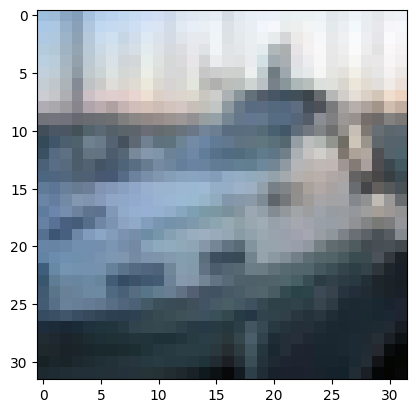

In [26]:
import matplotlib.pyplot as plt
print(classes[images[b'labels'][2]])
data = images[b'data'][2].reshape(3, 32, 32).transpose(1, 2, 0)
plt.imshow(data)
plt.show()

In [27]:
from PIL import Image
import numpy as np
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()

In [30]:
json.loads(body)

'{"data": [[[[0.23921573162078857, 0.23921573162078857, 0.09019613265991211, 0.035294175148010254, 0.301960825920105, 0.4274510145187378, 0.46666669845581055, 0.5137255191802979, 0.5607843399047852, 0.6078431606292725, 0.6392157077789307, 0.615686297416687, 0.7098039388656616, 0.7490196228027344, 0.7803921699523926, 0.8039215803146362, 0.6705882549285889, 0.772549033164978, 0.8117647171020508, 0.843137264251709, 0.8509804010391235, 0.8196078538894653, 0.8352941274642944, 0.8352941274642944, 0.8509804010391235, 0.772549033164978, 0.8039215803146362, 0.8666666746139526, 0.8196078538894653, 0.7882353067398071, 0.8588235378265381, 0.8666666746139526], [0.3333333730697632, 0.3490196466445923, 0.18431377410888672, 0.07450985908508301, 0.3647059202194214, 0.5137255191802979, 0.545098066329956, 0.5607843399047852, 0.615686297416687, 0.686274528503418, 0.7019608020782471, 0.6470588445663452, 0.7647058963775635, 0.8117647171020508, 0.8274509906768799, 0.8588235378265381, 0.7176470756530762, 0.78

In [31]:
import urllib.request
import json
import os
import ssl
from dotenv import load_dotenv
import torch
load_dotenv()

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
# The example below assumes JSON formatting which may be updated
# depending on the format your endpoint expects.
# More information can be found here:
# https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

image = Image.fromarray(data, 'RGB')
image = transform(image).float()
image = torch.tensor(image)
image = image.unsqueeze(0)
r_data = image.numpy()
r_data = json.dumps({"data": r_data.tolist()})

body = str.encode(r_data)


url = 'https://pytorch-model-endpoint.eastus.inference.ml.azure.com/score'
# Replace this with the primary/secondary key or AMLToken for the endpoint
api_key = os.getenv("ENDPOINT_KEY")
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")

# The azureml-model-deployment header will force the request to go to a specific deployment.
# Remove this header to have the request observe the endpoint traffic rules
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'pytorch-deployment' }

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

/var/folders/k0/bjcpnbwj2cq3g2fd6gr425zr0000gp/T/ipykernel_24288/2622532233.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image)


b'{"label": "ship", "probability": "0.35722026"}'


In [37]:
json.loads(result.decode())

{'label': 'ship', 'probability': '0.35722026'}